<a href="https://colab.research.google.com/github/arvind-maurya/IIML_Group_Project/blob/main/Predicting_Flight_Delay_Single_Airline_Airport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the flight dataset
import pandas as pd #the pandas library is useful for data processing


#Read CSV file from drive. Drive is used because size of the dataset is large
#You need to mound the drive before running this code. Everytime you need to mount the drive before running the code.
df = pd.read_csv('/content/drive/MyDrive/flight_dataset/flights.csv', low_memory=False)

#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:',df.shape)

Dataframe dimensions: (5819079, 31)


In [ ]:
flights_df = df.copy()

In [ ]:
#Lets look at the top rows in dataset
pd.set_option('display.max_columns', None)
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
column_to_remove = ['AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER']
flights_df.drop(column_to_remove, axis = 1, inplace = True)


In [ ]:
flights_df = flights_df[flights_df['AIRLINE'] == 'AA']
flights_df = flights_df[flights_df['ORIGIN_AIRPORT'] == 'PHL']
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
558,2015,1,1,4,AA,PHL,DFW,625,909.0,164.0,21.0,930.0,235.0,238.0,206.0,1303,1156.0,11.0,920,1207.0,167.0,0,0
2179,2015,1,1,4,AA,PHL,DFW,840,836.0,-4.0,12.0,848.0,235.0,227.0,210.0,1303,1118.0,5.0,1135,1123.0,-12.0,0,0
3420,2015,1,1,4,AA,PHL,CLT,1005,957.0,-8.0,26.0,1023.0,120.0,108.0,76.0,449,1139.0,6.0,1205,1145.0,-20.0,0,0
4457,2015,1,1,4,AA,PHL,MIA,1115,1109.0,-6.0,12.0,1121.0,171.0,153.0,138.0,1013,1339.0,3.0,1406,1342.0,-24.0,0,0
5372,2015,1,1,4,AA,PHL,DFW,1210,1230.0,20.0,17.0,1247.0,230.0,243.0,219.0,1303,1526.0,7.0,1500,1533.0,33.0,0,0


Dataset flights.csv file description
1. More than 5'810'000 flights have been recorded in 2015.
2. These flights are described according to 31 variables.
3. A description of these variables can be found below

**YEAR, MONTH, DAY, DAY_OF_WEEK**: dates of the flight

**AIRLINE**: An identification number assigned by US DOT to identify a unique airline

**ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: code attributed by IATA to identify the airports

**SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : scheduled times of take-off and landing

**DEPARTURE_TIME** and **ARRIVAL_TIME**: real times at which take-off and landing took place

**DEPARTURE_DELAY** and **ARRIVAL_DELAY**: difference (in minutes) between planned and real times

**DISTANCE**: distance (in miles)

An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

In [ ]:
print('Dataframe dimensions Before Droppping Null:',flights_df.shape)
flights_df=flights_df.dropna()
print('Dataframe dimensions After Dropping Null:',flights_df.shape)

Dataframe dimensions Before Droppping Null: (21093, 23)
Dataframe dimensions After Dropping Null: (20881, 23)


In [ ]:
import numpy as np
def transform_numeric(column_name):
  column= np.unique(flights_df[column_name])
  print(column_name, ' attribute unique value:',column)

  from sklearn.preprocessing import LabelEncoder
  gle = LabelEncoder()
  #transform airline column into numerical column
  column_tf = gle.fit_transform(flights_df[column_name])
  column_mappings = {index: label for index, label in
                    enumerate(gle.classes_)}
  print(column_name,' Mapping value:',column_mappings)
  return column_tf


In [ ]:
flights_df['AIRLINE_TF'] = transform_numeric('AIRLINE')
flights_df['ORIGIN_AIRPORT_TF'] = transform_numeric('ORIGIN_AIRPORT')
flights_df['DESTINATION_AIRPORT_TF'] = transform_numeric('DESTINATION_AIRPORT')


AIRLINE  attribute unique value: ['AA']
AIRLINE  Mapping value: {0: 'AA'}
ORIGIN_AIRPORT  attribute unique value: ['PHL']
ORIGIN_AIRPORT  Mapping value: {0: 'PHL'}
DESTINATION_AIRPORT  attribute unique value: ['ATL' 'AUS' 'BDL' 'BOS' 'CHS' 'CLE' 'CLT' 'DCA' 'DEN' 'DFW' 'DTW' 'FLL'
 'IAH' 'IND' 'JAX' 'LAS' 'LAX' 'LGA' 'MCO' 'MIA' 'MSP' 'MSY' 'ORD' 'PBI'
 'PDX' 'PHX' 'PIT' 'PVD' 'RDU' 'RIC' 'RSW' 'SAN' 'SAT' 'SEA' 'SFO' 'SJU'
 'SLC' 'SMF' 'STL' 'STT' 'TPA']
DESTINATION_AIRPORT  Mapping value: {0: 'ATL', 1: 'AUS', 2: 'BDL', 3: 'BOS', 4: 'CHS', 5: 'CLE', 6: 'CLT', 7: 'DCA', 8: 'DEN', 9: 'DFW', 10: 'DTW', 11: 'FLL', 12: 'IAH', 13: 'IND', 14: 'JAX', 15: 'LAS', 16: 'LAX', 17: 'LGA', 18: 'MCO', 19: 'MIA', 20: 'MSP', 21: 'MSY', 22: 'ORD', 23: 'PBI', 24: 'PDX', 25: 'PHX', 26: 'PIT', 27: 'PVD', 28: 'RDU', 29: 'RIC', 30: 'RSW', 31: 'SAN', 32: 'SAT', 33: 'SEA', 34: 'SFO', 35: 'SJU', 36: 'SLC', 37: 'SMF', 38: 'STL', 39: 'STT', 40: 'TPA'}


1. If you look the SCHEDULED_DEPARTURE, 	DEPARTURE_TIME and	DEPARTURE_DELAY they are correlated.
2. DEPARTURE_DELAY is calculated based on DEPARTURE_TIME minus SCHEDULED_DEPARTURE
3. Nagative value of DEPARTURE_DELAY means the flight is departed early.

In [ ]:
# flights_df['DEPARTURE_TIME_TF']=transform_numeric('DEPARTURE_TIME')

In [ ]:
# flights_df['SCHEDULED_DEPARTURE_TF']=transform_numeric('SCHEDULED_DEPARTURE')

From the data, i will delete the column which is not relevance for predicting the flight delay re-arranging the columns for better interpretation

In [ ]:
column_to_remove = ['AIRLINE',	'ORIGIN_AIRPORT',	'DESTINATION_AIRPORT']
flights_df.drop(column_to_remove, axis = 1, inplace = True)

In [ ]:

# shift column 'DEPARTURE_DELAY' to second position
DD_column = flights_df.pop('DEPARTURE_DELAY')

# insert column into the dataframe using insert(position,column_name,
# column_contents) function
flights_df.insert(0, 'DEPARTURE_DELAY', DD_column) #Insert as second column, so position is 1

print("After shifting DD column to first position")
flights_df.head()

After shifting DD column to first position


,DEPARTURE_DELAY,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_TF,ORIGIN_AIRPORT_TF,DESTINATION_AIRPORT_TF
558,164.0,2015,1,1,4,625,909.0,21.0,930.0,235.0,238.0,206.0,1303,1156.0,11.0,920,1207.0,167.0,0,0,0,0,9
2179,-4.0,2015,1,1,4,840,836.0,12.0,848.0,235.0,227.0,210.0,1303,1118.0,5.0,1135,1123.0,-12.0,0,0,0,0,9
3420,-8.0,2015,1,1,4,1005,957.0,26.0,1023.0,120.0,108.0,76.0,449,1139.0,6.0,1205,1145.0,-20.0,0,0,0,0,6
4457,-6.0,2015,1,1,4,1115,1109.0,12.0,1121.0,171.0,153.0,138.0,1013,1339.0,3.0,1406,1342.0,-24.0,0,0,0,0,19
5372,20.0,2015,1,1,4,1210,1230.0,17.0,1247.0,230.0,243.0,219.0,1303,1526.0,7.0,1500,1533.0,33.0,0,0,0,0,9


In [ ]:
# Replace negative values with 0
flights_df[flights_df['DEPARTURE_DELAY'] < 0] = 0

Now, we willl study the behaviour of other column on the departure delay column.

Now this problem is a linear regression in multi dimension

In [ ]:
#Given the large size of the dataset, I decide to consider only a subset of the data in order to reduce the computational time.
#I will just keep the flights from January 2015:
flights_df1 = flights_df[flights_df['MONTH'] == 1]
# flights_df1 = flights_df[flights_df['MONTH'] == 2]

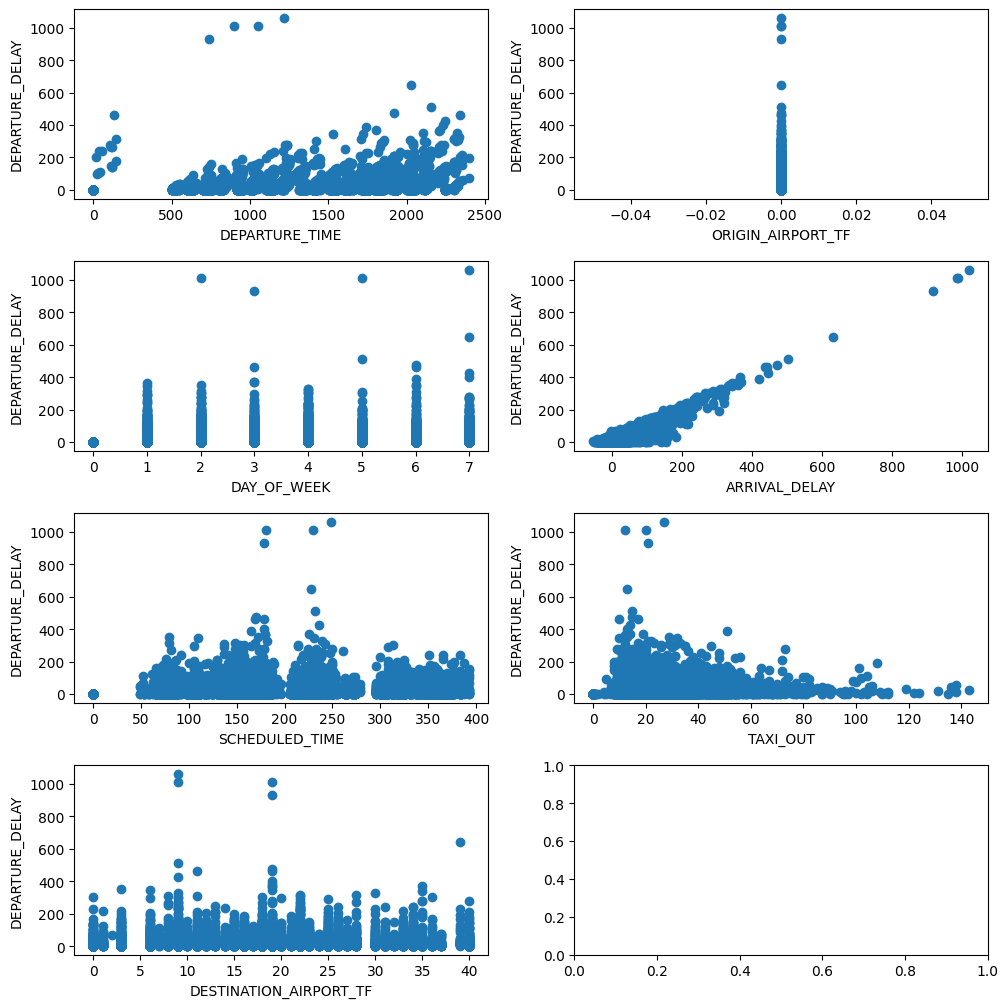

In [ ]:
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
#We will plot multiple scatter plots of TOC vs other attributes
fig = plt.figure(figsize=(10, 10))

fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

ax31 = fig.add_subplot(425)
ax32 = fig.add_subplot(426)
ax41 = fig.add_subplot(427)
ax42 = fig.add_subplot(428)

# scatter_plot(ax11,'YEAR')

ax11.scatter(flights_df['DEPARTURE_TIME'],flights_df['DEPARTURE_DELAY'])
#ax11.set_title('TOC vs Flight Length')
ax11.set_xlabel('DEPARTURE_TIME')
ax11.set_ylabel('DEPARTURE_DELAY')

ax12.scatter(flights_df['ORIGIN_AIRPORT_TF'],flights_df['DEPARTURE_DELAY'])
ax12.set_xlabel('ORIGIN_AIRPORT_TF')
ax12.set_ylabel('DEPARTURE_DELAY')

ax21.scatter(flights_df['DAY_OF_WEEK'],flights_df['DEPARTURE_DELAY'])
ax21.set_xlabel('DAY_OF_WEEK')
ax21.set_ylabel('DEPARTURE_DELAY')

ax22.scatter(flights_df['ARRIVAL_DELAY'],flights_df['DEPARTURE_DELAY'])
ax22.set_xlabel('ARRIVAL_DELAY')
ax22.set_ylabel('DEPARTURE_DELAY')

ax31.scatter(flights_df['SCHEDULED_TIME'],flights_df['DEPARTURE_DELAY'])
ax31.set_xlabel('SCHEDULED_TIME')
ax31.set_ylabel('DEPARTURE_DELAY')

ax32.scatter(flights_df['TAXI_OUT'],flights_df['DEPARTURE_DELAY'])
ax32.set_xlabel('TAXI_OUT')
ax32.set_ylabel('DEPARTURE_DELAY')

ax41.scatter(flights_df['DESTINATION_AIRPORT_TF'],flights_df['DEPARTURE_DELAY'])
ax41.set_xlabel('DESTINATION_AIRPORT_TF')
ax41.set_ylabel('DEPARTURE_DELAY')

# ax42.scatter(flights_df['AIR_TIME'],flights_df['DEPARTURE_DELAY'])
# ax42.set_xlabel('AIR_TIME')
# ax42.set_ylabel('DEPARTURE_DELAY')



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


In [ ]:
#Let us now compute beta
n = len(flights_df.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 20881


In [ ]:

#extract the predictor variable columns
X_data = flights_df.iloc[:, 1:]

Text(0.5, 1.0, 'Correlation Matrix')

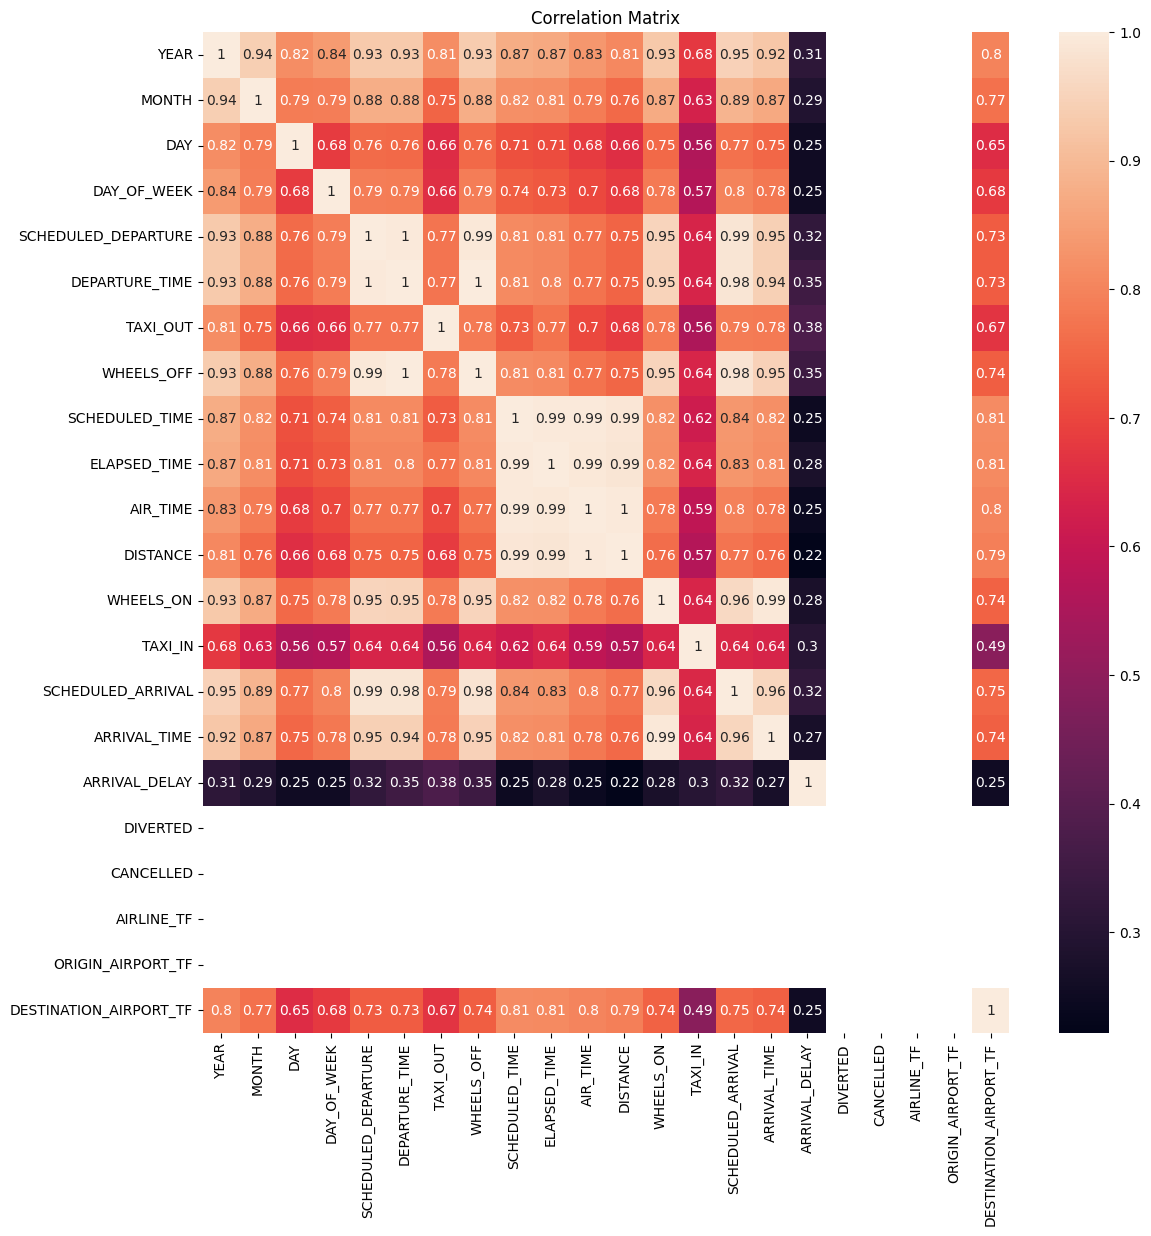

In [ ]:
import seaborn as sns
X_data.corr()
plt.rcParams["figure.figsize"] = (13,13) # Custom figure size in inches
sns.heatmap(X_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [ ]:
column1_to_remove = ['WHEELS_ON','AIR_TIME','ELAPSED_TIME','ARRIVAL_TIME','WHEELS_OFF','DISTANCE' ,'SCHEDULED_DEPARTURE']
X_data.drop(column1_to_remove, axis = 1, inplace = True)

In [ ]:

#convert predictor variable columns into a numpy array

X_array = X_data.values

In [ ]:

import numpy as np
#add a column of ones to X_array
X = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))


In [ ]:

#convert predictor variable columns into a numpy array

response_cols = [0]
y = flights_df[flights_df.columns[response_cols]].to_numpy()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients (slopes) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

score2=r2_score(y_test,y_pred)
print('R^2 score is:',score2)

Coefficients: [[ 1.36169256e-02 -5.12146489e-01 -5.42524768e-03  1.94818964e-01
   3.88548393e-03 -9.06933519e-01  4.44197856e-02 -8.74852372e-01
  -5.99139212e-04  9.43467755e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -1.07639925e-01  0.00000000e+00]]
Intercept: [-7.10542736e-15]
Mean Squared Error (MSE): 51.15401673672336
R^2 score is: 0.9619393019398017
